<font color='Green' size="6"> Housing Price Assignment</font>

## Problem Statement :
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know

Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

## Business Goal :
Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
Determine the optimal value of lambda for ridge and lasso regression.
This model will then be used by the management to understand how exactly the prices vary with the variables
They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
The model will be a good way for the management to understand the pricing dynamics of a new market.

# 

In [1]:
# Remove Warnings

import warnings
warnings.filterwarnings('ignore')

## Importing all the necessary libraries

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 

<font color='green' size="6"> Step 1: Reading and Understanding the Data </font>

In [3]:
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 1. Checking for any null values

In [6]:
housing.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
print(round(housing.isnull().sum()/len(housing.index)*100,2).sort_values(ascending=False)[ round(housing.isnull().sum()/len(housing.index),2) > 0 ])

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


inference: the number of missing values is more that 40% in few columns but mostly have NAN which we will intepret now.

In [8]:
#addressing NaN values based on data dictionary

# In column 'PoolQC' (Pool quality), NaN stands for No Pool
housing['PoolQC'] = housing['PoolQC'].fillna('No_Pool')

# In column 'MiscFeature' (Miscellaneous Features), NaN stands for None, meaning the house has no miscellaneous features.
housing['MiscFeature'] = housing['MiscFeature'].fillna('None')

# In column 'Alley', NaN stands for No Alley Access as per the data dictionary
housing['Alley'] = housing['Alley'].fillna('No_Alley_Access')

# In column 'Fence' (Fence Quality), NaN stands for No Fence as per the data dictionary
housing['Fence'] = housing['Fence'].fillna('No_Fence')

# In column 'FireplaceQu' (FireplaceQu Quality), NaN stands for No Fireplace as per the data dictionary
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('No_Fireplace')

# LotFrontage stands for Linear feet of street connected to property, there is no explanation to impute this in data dictionary
# Let's consider imputing it with median of the lotFrontage of houses in the same neighbourhood

# Group data by neighborhood and impute missing value with median LotFrontage of all the neighborhood
housing["LotFrontage"] = housing.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# In column 'GarageYrBlt' (Gargage Year Built), NaN stands for houses with no garage, let's impute with 0
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)

# 'GarageType', 'GarageFinish', 'GarageQual' (Garage Quality) and 'GarageCond'(Garage Condition)
# Missing values signify no garage as per data dictionary.let's impute NaN values here with No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    housing[col] = housing[col].fillna('No_Garage')

#BsmtFinType1, BsmtFinType2 (Rating of basement finished area),
#BsmtExposure (Basement Exposure), BsmtQual(Basement Quality), BsmtCond (Basement Conidtion)
#These are all parameter related to basement. A NaN value probably signifies that the house does not have a basement.
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    housing[col] = housing[col].fillna('No_Basement')
    
# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode "None"
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')

# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode 0 corresponding to None
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)

# In column 'Electrical' (Electrical system), let's impute NaN with "Other"
housing['Electrical'] = housing['Electrical'].fillna("Other")

In [9]:
print(round(housing.isnull().sum()/len(housing.index)*100,2).sort_values(ascending=False))

Id             0.0
CentralAir     0.0
GarageYrBlt    0.0
GarageType     0.0
FireplaceQu    0.0
              ... 
MasVnrArea     0.0
MasVnrType     0.0
Exterior2nd    0.0
Exterior1st    0.0
SalePrice      0.0
Length: 81, dtype: float64


inference: all the missing values are being dealth with.

### 2.checking for any duplicates value

In [10]:
housing.shape

(1460, 81)

In [11]:
housing.drop_duplicates(inplace= True)

In [12]:
housing.shape

(1460, 81)

inference: there is no duplicate value

# 

<font color='green' size="6"> Step 2: Visualizing the Data</font>

In [13]:
numeric_data= housing.select_dtypes(['int64', 'float64'])
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
## "MSSubClass" is a numeric column but it should actually be categorical as per the data dictionary, so let's convert that.

housing=housing.replace({'MSSubClass' : { 20 : '1-STORY 1946 & NEWER ALL STYLES', 
                                          30:'1-STORY 1945 & OLDER',
                                          40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                          45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                          50:'1-1/2 STORY FINISHED ALL AGES',
                                          60:'2-STORY 1946 & NEWER',
                                          70:'2-STORY 1945 & OLDER',
                                          75:'2-1/2 STORY ALL AGES',
                                          80:'SPLIT OR MULTI-LEVEL',
                                          85:'SPLIT FOYER',
                                          90:'DUPLEX - ALL STYLES AND AGES',
                                         120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                         150:'1-1/2 STORY PUD - ALL AGES',
                                         160:'2-STORY PUD - 1946 & NEWER',
                                         180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                         190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}})

In [15]:
def pairplt(u,w,x,y,z):
    plt.figure(figsize=(10,10))
    sns.pairplot(numeric_data, x_vars=[u,w,x,y,z], y_vars=['SalePrice'])
    plt.show()

<Figure size 1000x1000 with 0 Axes>

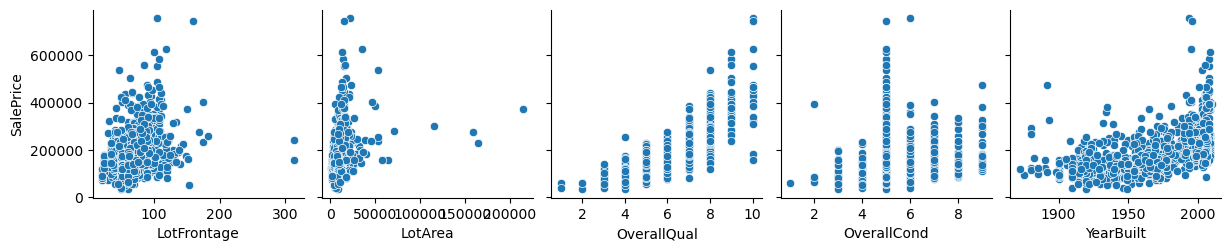

<Figure size 1000x1000 with 0 Axes>

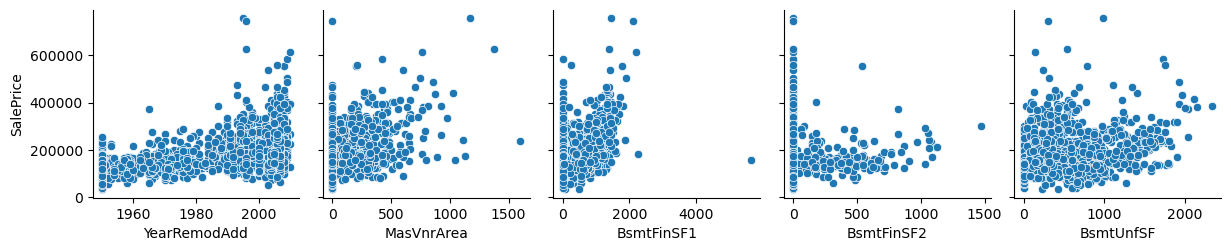

<Figure size 1000x1000 with 0 Axes>

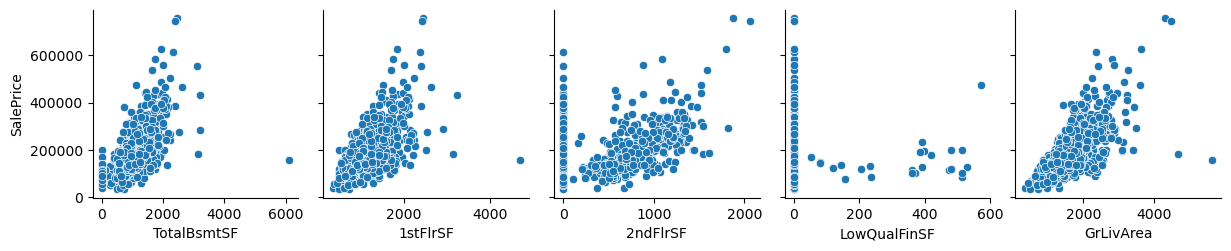

<Figure size 1000x1000 with 0 Axes>

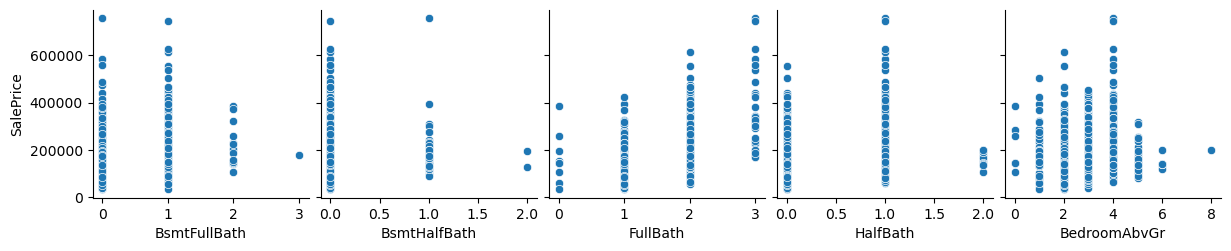

<Figure size 1000x1000 with 0 Axes>

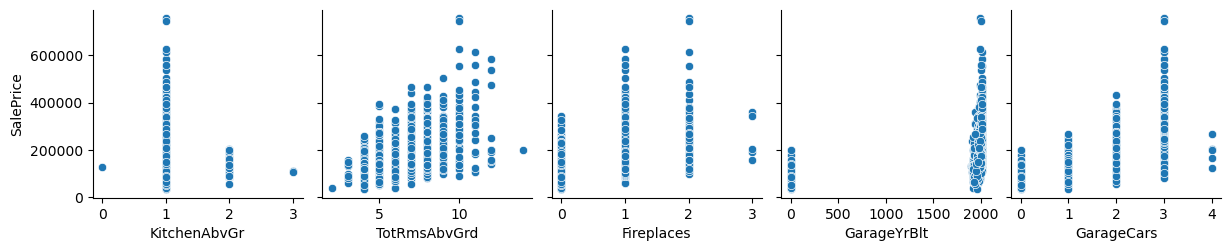

<Figure size 1000x1000 with 0 Axes>

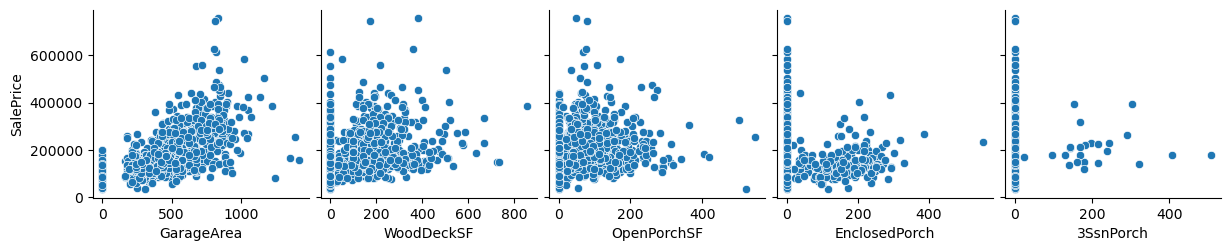

<Figure size 1000x1000 with 0 Axes>

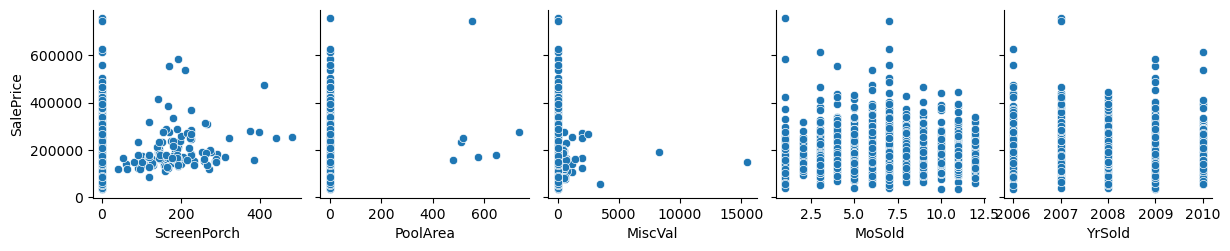

In [16]:
pairplt('LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond','YearBuilt');
pairplt('YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF');
pairplt('TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea');
pairplt('BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr');
pairplt('KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars');
pairplt('GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch');
pairplt('ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold');

inference: there are visible linear pattern associated with sales price

### 2.1 label encoding

In [17]:
housing = housing.replace({  "Alley":        {"No_Alley_Access" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "BsmtExposure": {"No_Basement" : 0, "No" : 2, "Mn" : 2, "Av": 3, 
                                        "Gd" : 4},
                       "BsmtFinType1": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "CentralAir":   {"None" : 0, "N" : 1, "Y" : 2},
                       "ExterCond":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "ExterQual":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "Fence":        {"No_Fence" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv": 3, 
                                        "GdPrv" : 4},
                       "FireplaceQu":  {"No_Fireplace" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "Functional":   {"None" : 0, "Sal" : 1, "Sev" : 2, "Maj2" : 3, 
                                        "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, 
                                        "Typ" : 8},
                       "GarageCond":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageQual":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageFinish": {"No_Garage" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "HeatingQC":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "KitchenQual":  {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "LandContour":  {"None" : 0, "Low" : 1, "HLS" : 2, "Bnk" : 3, 
                                        "Lvl" : 4},
                       "LandSlope":    {"None" : 0, "Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape":     {"None" : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3, 
                                        "Reg" : 4},
                       "PavedDrive":   {"None" : 0, "N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC":       {"No_Pool" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, 
                                        "Ex" : 4},
                       "Street":       {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "Utilities":    {"None" : 0, "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, 
                                        "AllPub" : 4}}
                     )

housing.BsmtCond = housing.BsmtCond.astype(int)

In [18]:
## FUNCTION TO PLOT CHARTS

def plot_charts(var1,var2,label_rotation):
    plt.figure(figsize=(14, 6))   
    plt.subplot(1,2,1)
    plt.title(var1+' vs Price')
    plt1=sns.boxplot(x=housing[var1], y=housing.SalePrice, palette=("husl"))
    if(label_rotation):
        plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
    
    plt.subplot(1,2,2)
    plt.title(var2+' vs Price')
    plt2=sns.boxplot(x=housing[var2], y=housing.SalePrice, palette=("husl"))
    if(label_rotation):
        plt2.set_xticklabels(plt2.get_xticklabels(),rotation=90)
        
    plt.show()

In [19]:
categorical_features=housing.select_dtypes(include='object')
categorical_features.columns

Index(['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

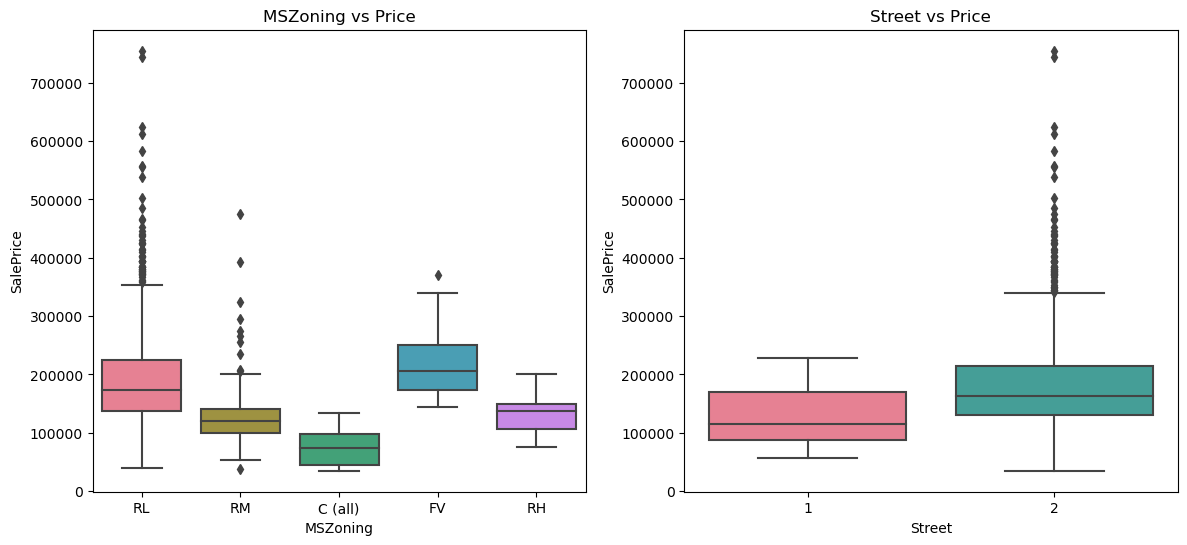

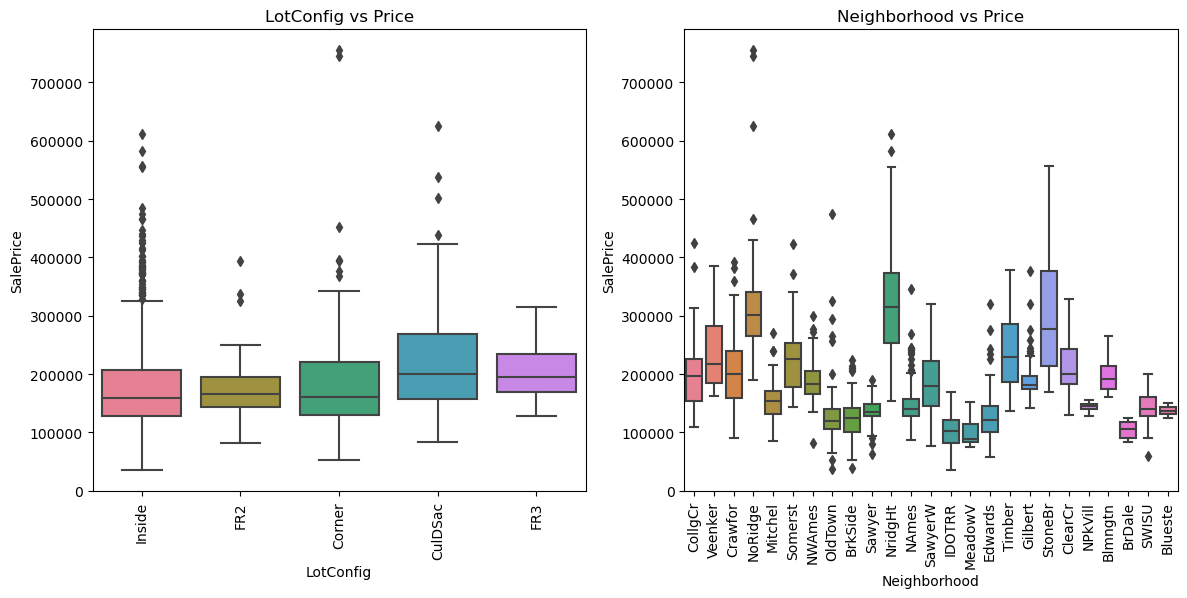

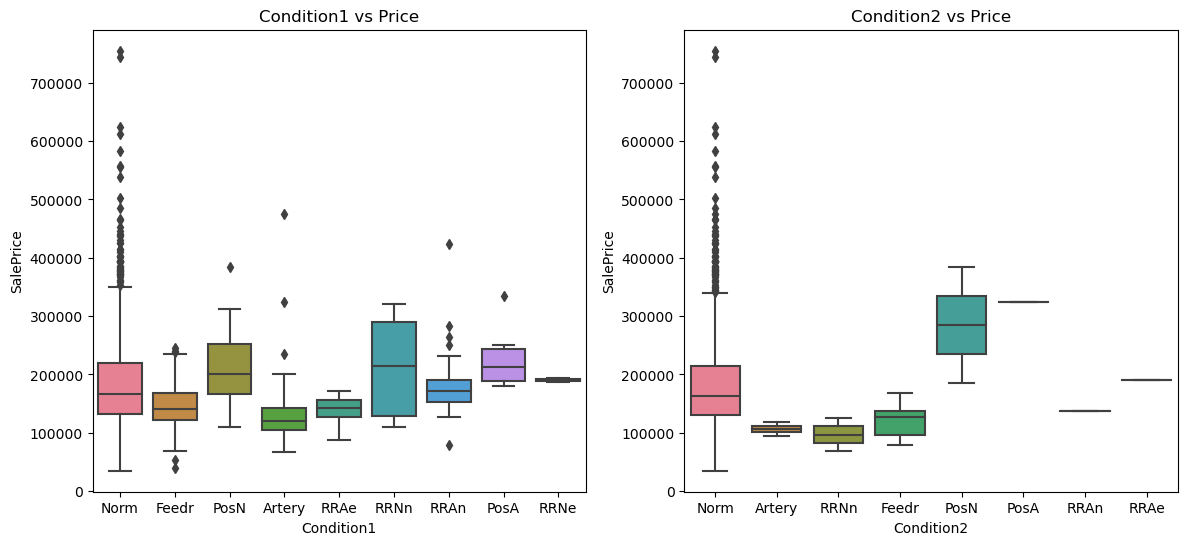

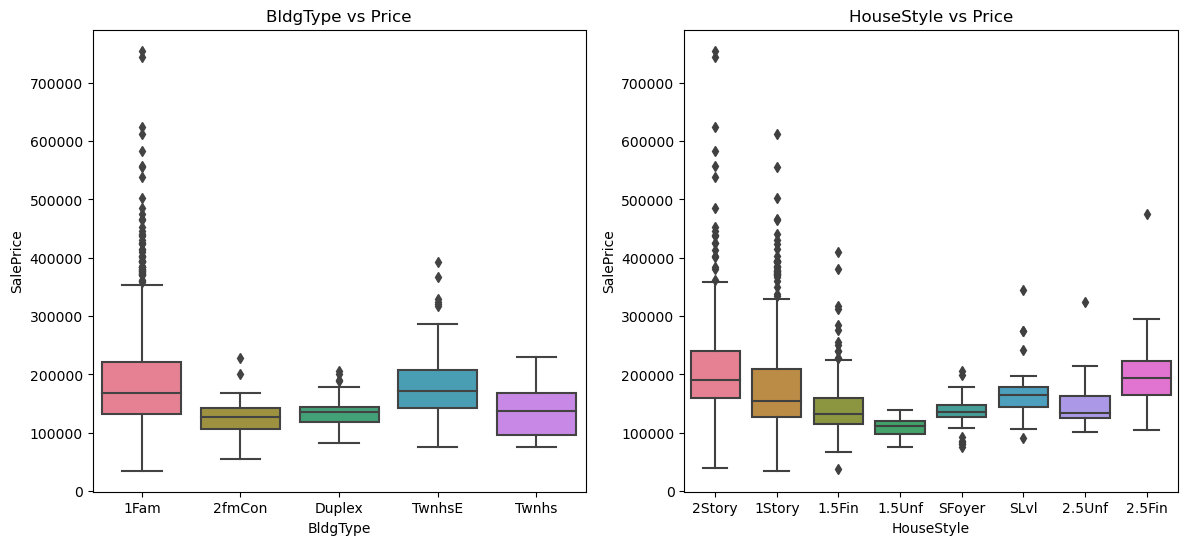

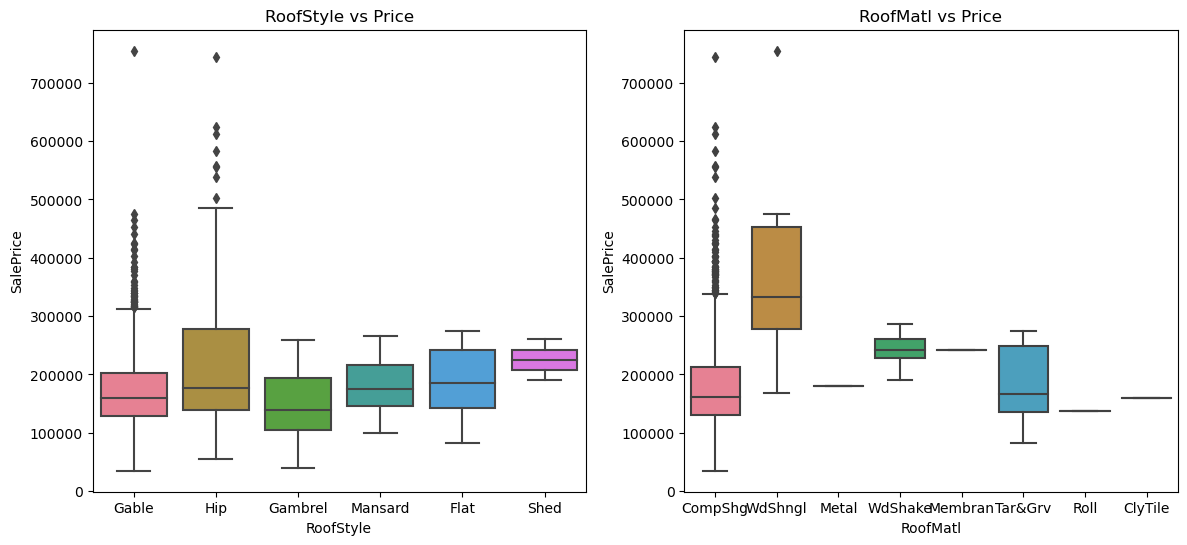

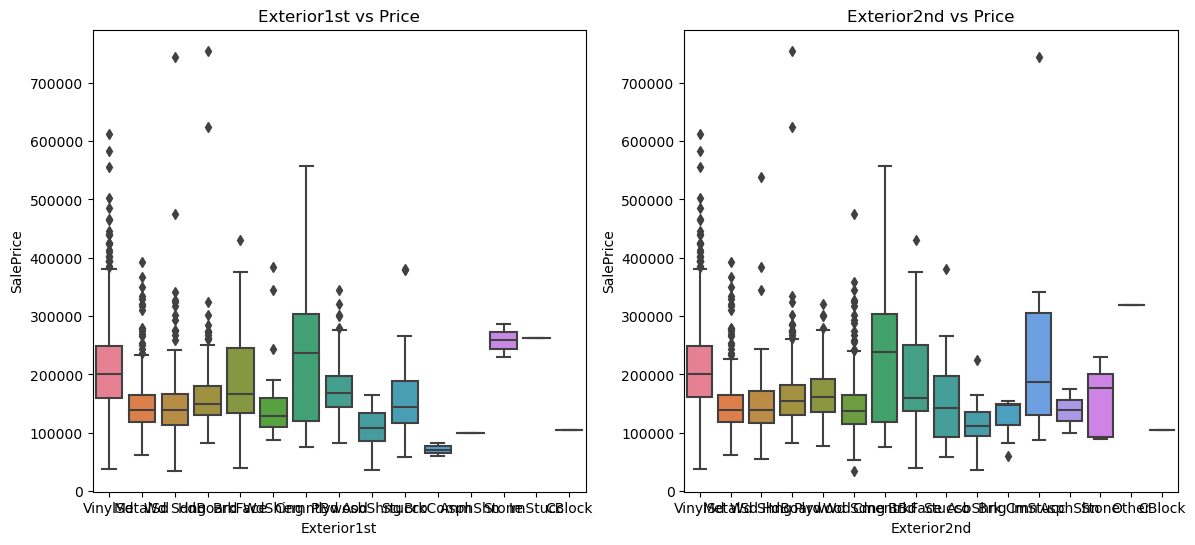

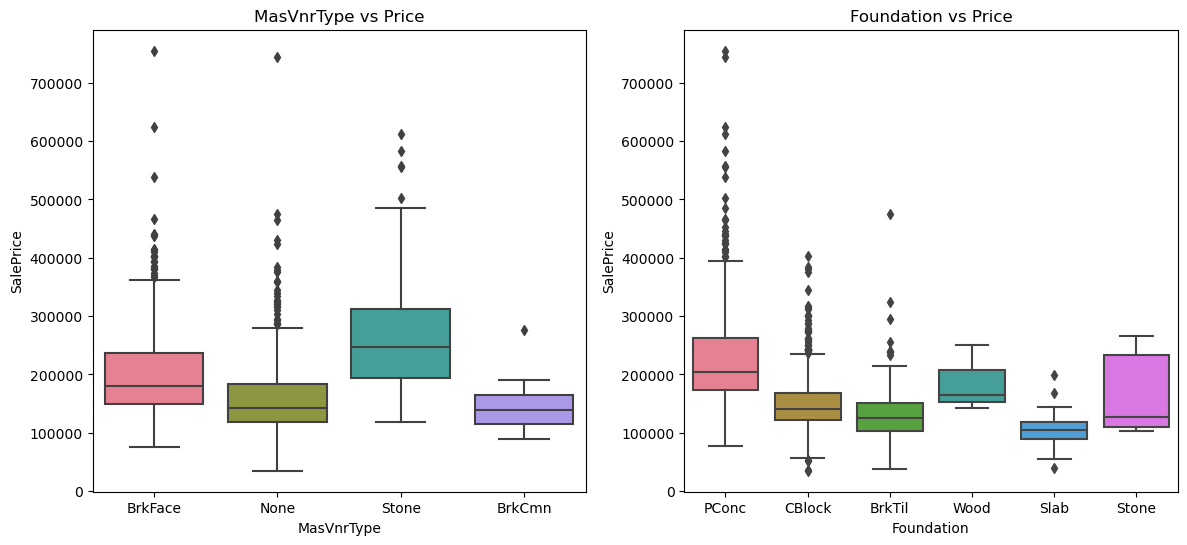

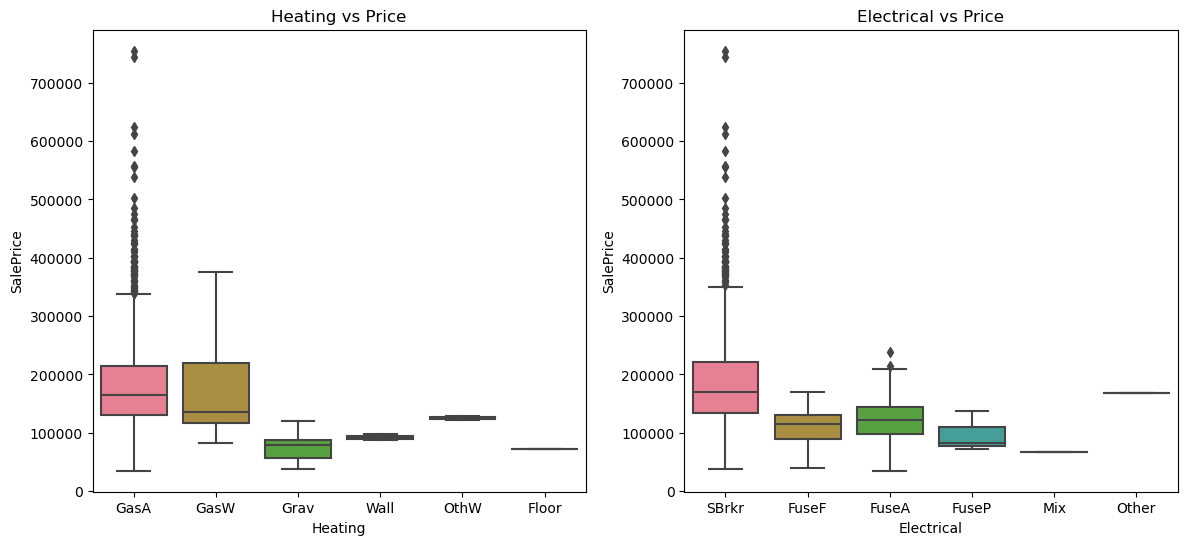

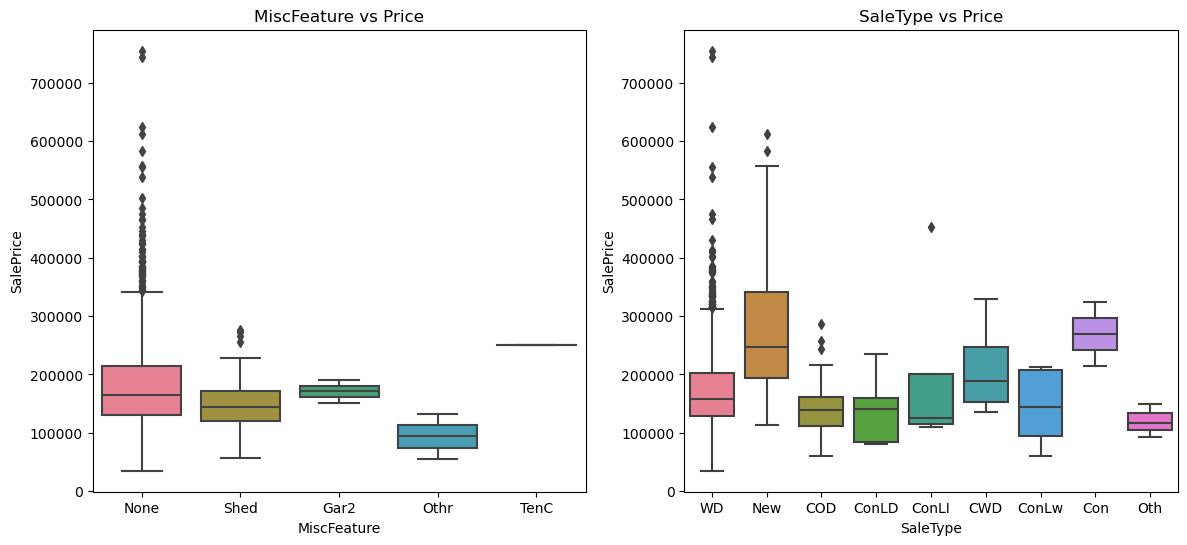

In [20]:
plot_charts('MSZoning', 'Street', label_rotation=False)
plot_charts('LotConfig', 'Neighborhood', label_rotation=True)
plot_charts('Condition1','Condition2', label_rotation=False)
plot_charts('BldgType', 'HouseStyle', label_rotation=False)
plot_charts('RoofStyle', 'RoofMatl', label_rotation=False)
plot_charts('Exterior1st', 'Exterior2nd', label_rotation=False)
plot_charts('MasVnrType', 'Foundation', label_rotation=False)
plot_charts('Heating','Electrical', label_rotation=False)
plot_charts('MiscFeature', 'SaleType', label_rotation=False)


inference: we can observe that many feature contains outliers, we will try to remove them.

In [21]:
housing.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

# 

<font color='green' size="6"> Step 3: Data preparation</font>

### 3.1 converting datatypes

In [22]:
#changing months to categorical
import calendar

housing['MonthSold'] = housing['MoSold'].apply(lambda x: calendar.month_name[x])
housing=housing.drop(['MoSold'], axis=1)

In [23]:
housing['GarageYrBlt']=housing['GarageYrBlt'].astype('int64')

In [24]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 3.2 creating new variable

In [25]:
housing['house_age']= housing['YrSold']-housing['YearBuilt']
housing['remod_age']=housing['YrSold']-housing['YearRemodAdd']
housing['garage_age']=housing['YrSold']-housing['GarageYrBlt']
housing= housing.drop(['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'], axis=1)

In [26]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

### 3.3 treating outliers

In [27]:
numeric_list = housing.select_dtypes(['float64','int64'])
numeric_list.columns

Index(['Id', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscVal', 'SalePrice', 'house_age', 'remod_age',
       'garage_age'],
      dtype='object')

In [28]:
def remove_outlier(df, num_list):
    for i in num_list:
        Q1= df[i].quantile(0.05)
        Q3= df[i].quantile(0.95)
        IQR=Q3-Q1
        df=df[(df[i]>= Q1- 2.5*IQR) & (df[i] <= Q3+2.5*IQR)]
    return df

In [29]:
housing= remove_outlier(housing, numeric_list)

In [30]:
housing.shape

(1158, 80)

### 3.4 correlation matrix

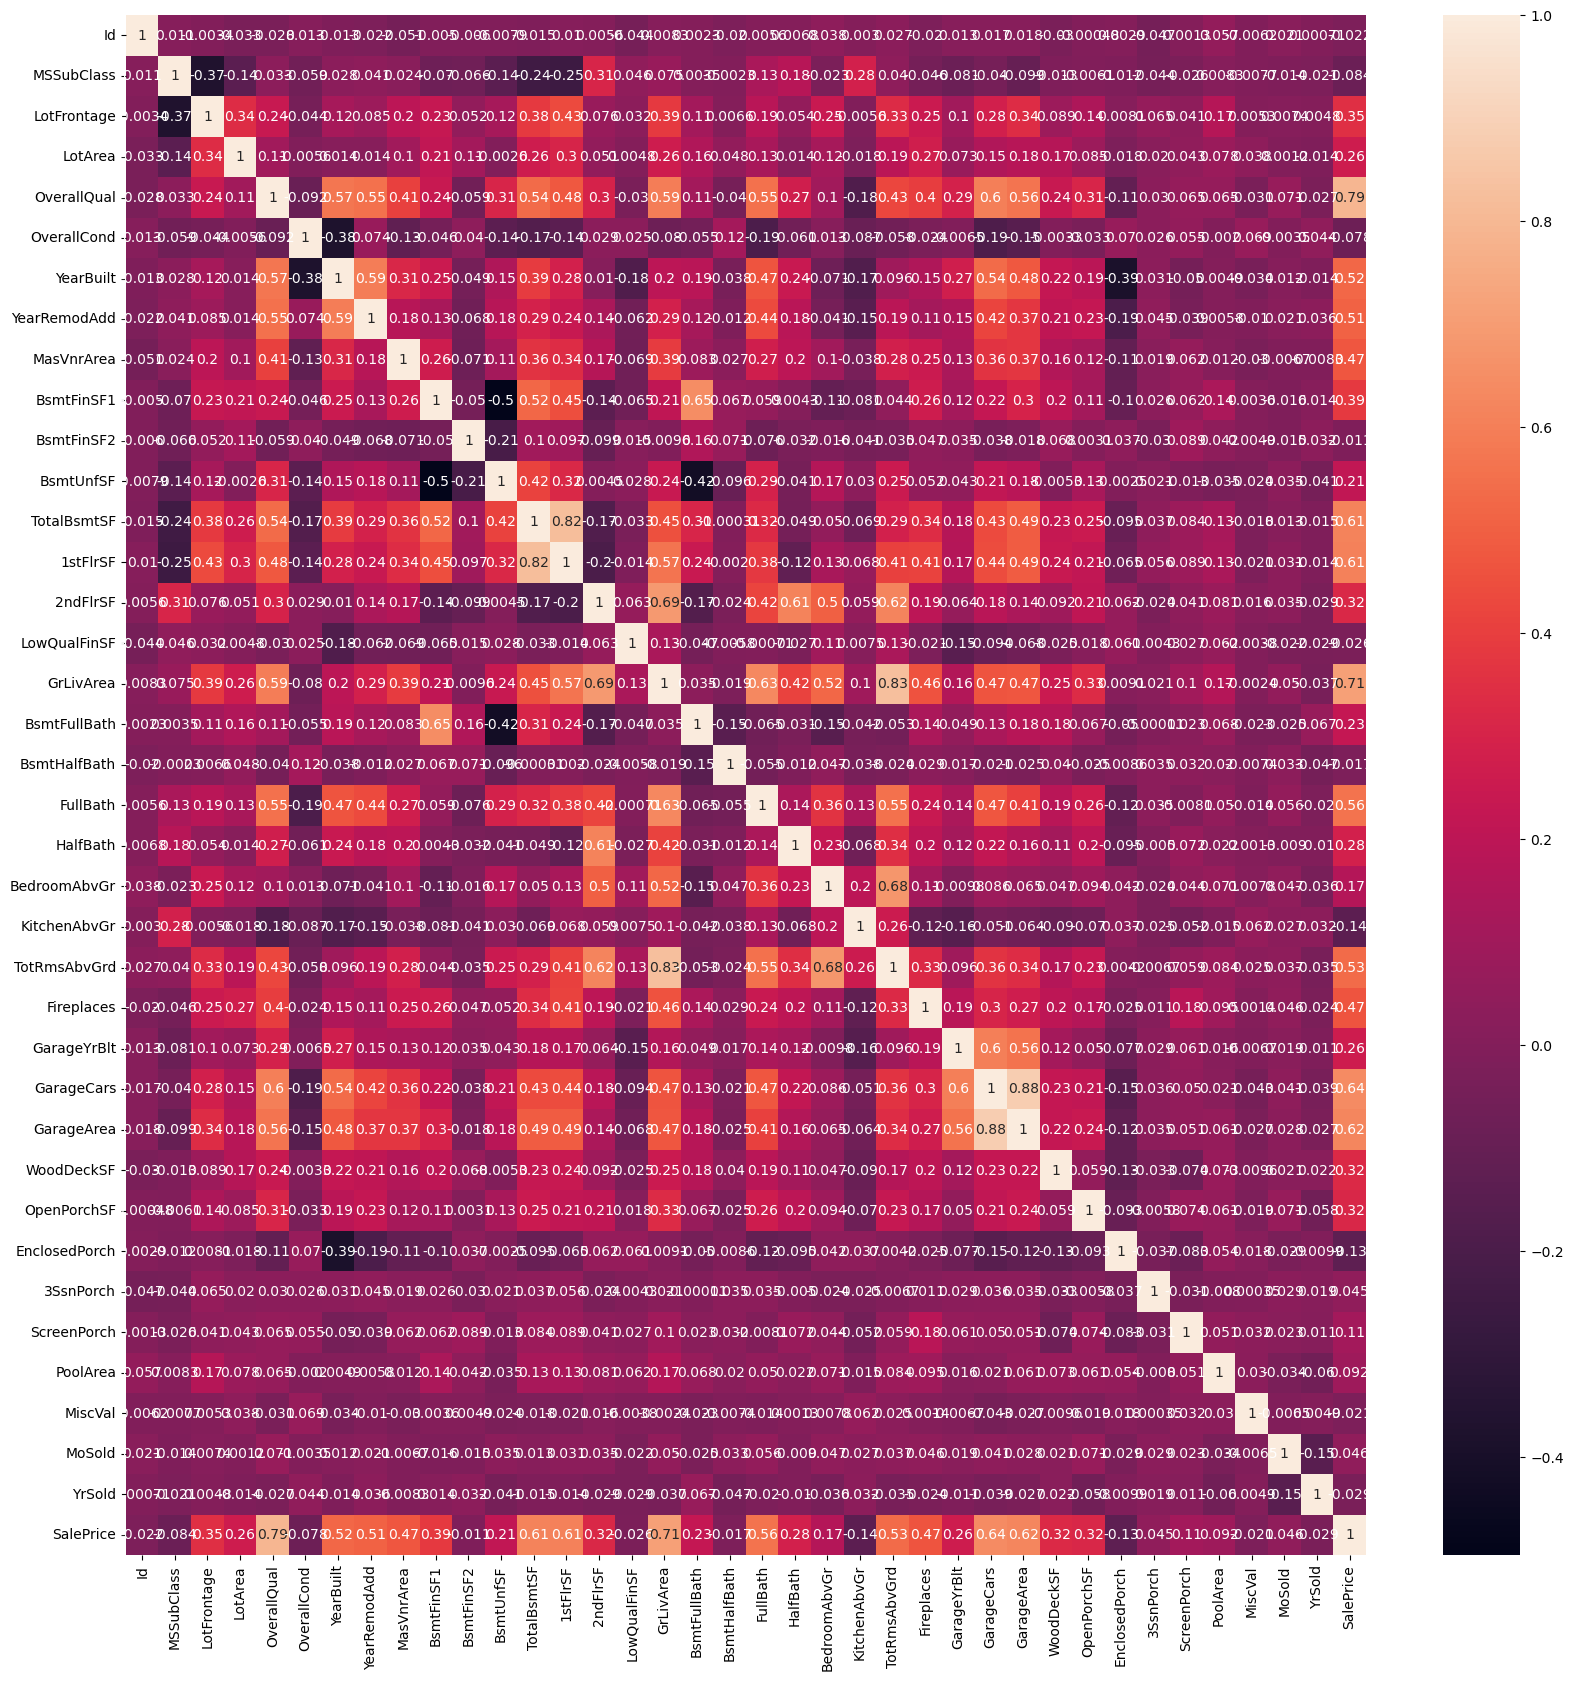

In [31]:
cor = numeric_data.corr()
plt.figure(figsize=(20,20))

sns.heatmap(cor, annot=True)
plt.show()

inference: the correlation is high among certain variable, we will address them later using vif.

### 3.5 creating dummy variables

In [32]:
housing = housing.drop(['Id'], axis=1)

In [33]:
#converting binary variables to numeric by mapping to 0 and 1

housing['Street'] = housing['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
housing['CentralAir'] = housing['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
housing['PavedDrive'] = housing['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [34]:
housing_categorical = housing.select_dtypes(include=['object'])
housing_categorical.head()

,MSSubClass,MSZoning,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,MiscFeature,SaleType,SaleCondition,MonthSold
0,2-STORY 1946 & NEWER,RL,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal,February
1,1-STORY 1946 & NEWER ALL STYLES,RL,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,...,MetalSd,None,CBlock,GasA,SBrkr,Attchd,None,WD,Normal,May
2,2-STORY 1946 & NEWER,RL,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal,September
3,2-STORY 1945 & OLDER,RL,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,...,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,None,WD,Abnorml,February
4,2-STORY 1946 & NEWER,RL,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal,December


In [35]:
housing = pd.get_dummies(data=housing,columns=housing_categorical.columns ,drop_first=True)
housing.head()

,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,...,MonthSold_December,MonthSold_February,MonthSold_January,MonthSold_July,MonthSold_June,MonthSold_March,MonthSold_May,MonthSold_November,MonthSold_October,MonthSold_September
0,65.0,8450,0,0,4,4,4,3,7,5,...,0,1,0,0,0,0,0,0,0,0
1,80.0,9600,0,0,4,4,4,3,6,8,...,0,0,0,0,0,0,1,0,0,0
2,68.0,11250,0,0,3,4,4,3,7,5,...,0,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,3,4,4,3,7,5,...,0,1,0,0,0,0,0,0,0,0
4,84.0,14260,0,0,3,4,4,3,8,5,...,1,0,0,0,0,0,0,0,0,0


In [36]:
housing.shape

(1158, 208)

### 3.6 splitting data

In [37]:
#train_test_split
df_train,df_test=train_test_split(housing,train_size=0.70, random_state=100)
df_train.shape

(810, 208)

In [38]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop('SalePrice',1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop('SalePrice',1)

##### As Dependant Variable (Sales) is Positively Skewed, We will take the logarithmic on Sales to reduce the effect of Outliers

In [39]:
num_vars = X_train.select_dtypes(['int64','float64']).columns
num_vars

Index(['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'house_age',
       'remod_age', 'garage_age'],
      dtype='object')

### 3.7 scaling the train,test

In [40]:
scaler = StandardScaler()

In [41]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

# 

<font color='green' size="6"> Step 4: Building a Linear model using RFE</font>

In [42]:
lm =LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [43]:
rfe=RFE(lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [44]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 141),
 ('LotArea', False, 111),
 ('Street', False, 42),
 ('Alley', False, 143),
 ('LotShape', False, 177),
 ('LandContour', False, 173),
 ('Utilities', False, 41),
 ('LandSlope', False, 40),
 ('OverallQual', False, 54),
 ('OverallCond', False, 94),
 ('MasVnrArea', False, 139),
 ('ExterQual', False, 178),
 ('ExterCond', False, 137),
 ('BsmtQual', False, 158),
 ('BsmtCond', False, 179),
 ('BsmtExposure', False, 131),
 ('BsmtFinType1', False, 136),
 ('BsmtFinSF1', False, 34),
 ('BsmtFinType2', False, 186),
 ('BsmtFinSF2', False, 36),
 ('BsmtUnfSF', False, 35),
 ('TotalBsmtSF', False, 33),
 ('HeatingQC', False, 153),
 ('CentralAir', False, 31),
 ('1stFlrSF', False, 28),
 ('2ndFlrSF', False, 27),
 ('LowQualFinSF', False, 25),
 ('GrLivArea', False, 26),
 ('BsmtFullBath', False, 160),
 ('BsmtHalfBath', False, 168),
 ('FullBath', False, 162),
 ('HalfBath', False, 161),
 ('BedroomAbvGr', False, 148),
 ('KitchenAbvGr', False, 24),
 ('KitchenQual', False, 123),
 ('TotRmsAb

In [45]:
col= X_train.columns[rfe.support_]
X_train_rfe= X_train[col]

In [46]:
X_train_new=X_train.columns[~rfe.support_]

In [47]:
# adding constant
import statsmodels.api as sm
X_train_rfe =sm.add_constant(X_train_rfe)

In [48]:
lm= sm.OLS(y_train, X_train_rfe).fit()

In [49]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     13.44
Date:                Wed, 24 May 2023   Prob (F-statistic):           1.93e-38
Time:                        21:45:58   Log-Likelihood:                -206.62
No. Observations:                 810   AIC:                             455.2
Df Residuals:                     789   BIC:                             553.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.8730      0.200     59.417      0.000      11.481      12.265
Condition2_Norm        -0.3011      0.191     -1.577      0.115      -0.676       0.074
Condition2_PosA         0.5483      0.371      1.478      0.140      -0.180       1.276
Condition2_RRNn        -0.7636      0.296     -2.583      0.010      -1.344      -0.183
Exterior1st_BrkComm    -0.5698      0.334     -1.705      0.089      -1.226       0.086
Exterior1st_BrkFace     0.5367      0.126      4.253      0.000       0.289       0.784
Exterior1st_CemntBd    -0.2871      0.379     -0.757      0.449      -1.032       0.457
Exterior1st_HdBoard     0.4004      0.111      3.596      0.000       0.182       0.619
Exterior1st_ImStucc     0.9042      0.334      2.706      0.007       0.248       1.560
Exterior1st_MetalSd     0.3259      0.112      2.920      0.004       0.107       0.545
Exterior1st_Plywood     0.4500      0.116      3.888      0.000       0.223       0.677
Exterior1st_Stone       0.9953      0.334      2.978      0.003       0.339       1.651
Exterior1st_Stucco      0.4246      0.201      2.109      0.035       0.029       0.820
Exterior1st_VinylSd     0.6609      0.109      6.063      0.000       0.447       0.875
Exterior1st_Wd Sdng     0.2702      0.112      2.412      0.016       0.050       0.490
Exterior1st_WdShing     0.2741      0.137      1.995      0.046       0.004       0.544
Exterior2nd_CmentBd     0.8474      0.359      2.359      0.019       0.142       1.553
Exterior2nd_Other       0.4402      0.317      1.389      0.165      -0.182       1.062
Exterior2nd_Stucco     -0.2296      0.171     -1.343      0.180      -0.565       0.106
Heating_Grav           -0.3733      0.225     -1.661      0.097      -0.815       0.068
Heating_Wall           -0.3533      0.328     -1.078      0.281      -0.997       0.290
==============================================================================
Omnibus:                       29.565   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.499
Skew:                           0.310   Prob(JB):                     1.32e-10
Kurtosis:                       3.981   Cond. No.                         72.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 ##### inference: the r2 value is too low using linear regression using rfe

In [50]:
def checkvif(df):
    vif= pd.DataFrame()
    vif['Features']=df.columns 
    vif['VIF']= [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF']= round(vif['VIF'], 2)
    vif= vif.sort_values(by= "VIF", ascending=False)
    return vif

In [51]:
checkvif(X_train_rfe)

,Features,VIF
0,const,323.06
6,Exterior1st_CemntBd,38.83
16,Exterior2nd_CmentBd,36.05
13,Exterior1st_VinylSd,23.16
7,Exterior1st_HdBoard,12.75
9,Exterior1st_MetalSd,12.28
14,Exterior1st_Wd Sdng,11.36
10,Exterior1st_Plywood,6.86
12,Exterior1st_Stucco,3.60
5,Exterior1st_BrkFace,3.56


inference: this tells us that there is a lot of correlation between variables

# 

<font color='green' size="6"> Step 5: Building a Linear model using Ridge Regression</font>

In [52]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

ridge = Ridge()

# cross validation for ridge alpha
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
print(model_cv.best_params_)

{'alpha': 8.0}


### inference: the best alpha for ridge regression is 8

In [54]:
# lets build the final ridge model

ridgereg = Ridge(alpha = 8)
ridgereg.fit(X_train, y_train)

Ridge(alpha=8)

In [55]:
#lets predict the R-squared value of test and train data
y_train_pred = ridgereg.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

0.9299162769875283


In [56]:
y_test_pred = ridgereg.predict(X_test)
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.9143482004006656


In [57]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.014409321066516274


### Inference: the test r2 score is very near to train r2 score which means that there is no overfitting which is good

In [58]:
#Displaing the co-efficients of the model
ridge_coeff = pd.DataFrame(np.atleast_2d(ridgereg.coef_),columns=X_train.columns)
ridge_coeff = ridge_coeff.T
ridge_coeff.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff.head(10)

,Ridge Co-Efficient
Neighborhood_StoneBr,0.108729
Neighborhood_Crawfor,0.078849
Condition2_Norm,0.073274
Exterior1st_BrkFace,0.065115
OverallQual,0.065053
Neighborhood_NridgHt,0.060942
MSZoning_FV,0.055821
SaleCondition_Normal,0.053481
Condition1_Norm,0.044741
GrLivArea,0.041793


In [59]:
# lets build the final ridge model with twice the alpha

ridgereg2 = Ridge(alpha = 16)
ridgereg2.fit(X_train, y_train)

Ridge(alpha=16)

In [60]:
#lets predict the R-squared value of test and train data
y_train_pred = ridgereg2.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))

0.9248157635562784


In [61]:
#Displaing the co-efficients of the model
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridgereg2.coef_),columns=X_train.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2.head(10)

,Ridge Co-Efficient
Neighborhood_StoneBr,0.073322
OverallQual,0.066650
Neighborhood_Crawfor,0.060807
Condition2_Norm,0.049950
Exterior1st_BrkFace,0.049756
Neighborhood_NridgHt,0.047900
SaleCondition_Normal,0.046873
Condition1_Norm,0.040418
GrLivArea,0.040376
OverallCond,0.040285


# 

<font color='green' size="6"> Step 6: Building a Linear model using Lasso Regression</font>

In [62]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

lasso = Lasso()

# cross validation for ridge alpha
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
print(model_cv.best_params_)

{'alpha': 0.001}


### Inference: the best alpha for lasso regression is 0.001¶

In [64]:
lasso =Lasso(alpha =0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [65]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(r2_score(y_train, y_train_pred))

0.9227862283066279


In [66]:
y_test_pred = lasso.predict(X_test)
print(r2_score(y_test, y_test_pred))

0.9197730237610156


In [67]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.013496695507052504


In [68]:
#Displaing the co-efficients of the model
lasso_coeff = pd.DataFrame(np.atleast_2d(lasso.coef_),columns=X_train.columns)
lasso_coeff = lasso_coeff.T
lasso_coeff.rename(columns={0: 'lasso Co-Efficient'},inplace=True)
lasso_coeff.sort_values(by=['lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff.head(10)

,lasso Co-Efficient
Neighborhood_StoneBr,0.113231
Neighborhood_Crawfor,0.079119
GrLivArea,0.078501
OverallQual,0.073781
Neighborhood_NridgHt,0.056145
Exterior1st_BrkFace,0.055713
SaleCondition_Partial,0.054588
MSZoning_FV,0.052616
SaleCondition_Normal,0.046321
OverallCond,0.041819


# 

<font color='green' size="6"> Step 7. Comparing Ridge and Lasso Regression : (Choosing Best Model)</font>

In [69]:
coefficients = ridgereg.coef_

# Count non-zero coefficients
ridge_coeff = sum(coefficients != 0)
print(ridge_coeff)


187


In [70]:
coefficients = lasso.coef_

# Count non-zero coefficients
lasso_coeff = sum(coefficients != 0)

In [71]:

print('Total Coeffs in Lasso Regression:',lasso_coeff)
print('Total Coeffs in Ridge Regression:',ridge_coeff)

Total Coeffs in Lasso Regression: 77
Total Coeffs in Ridge Regression: 187


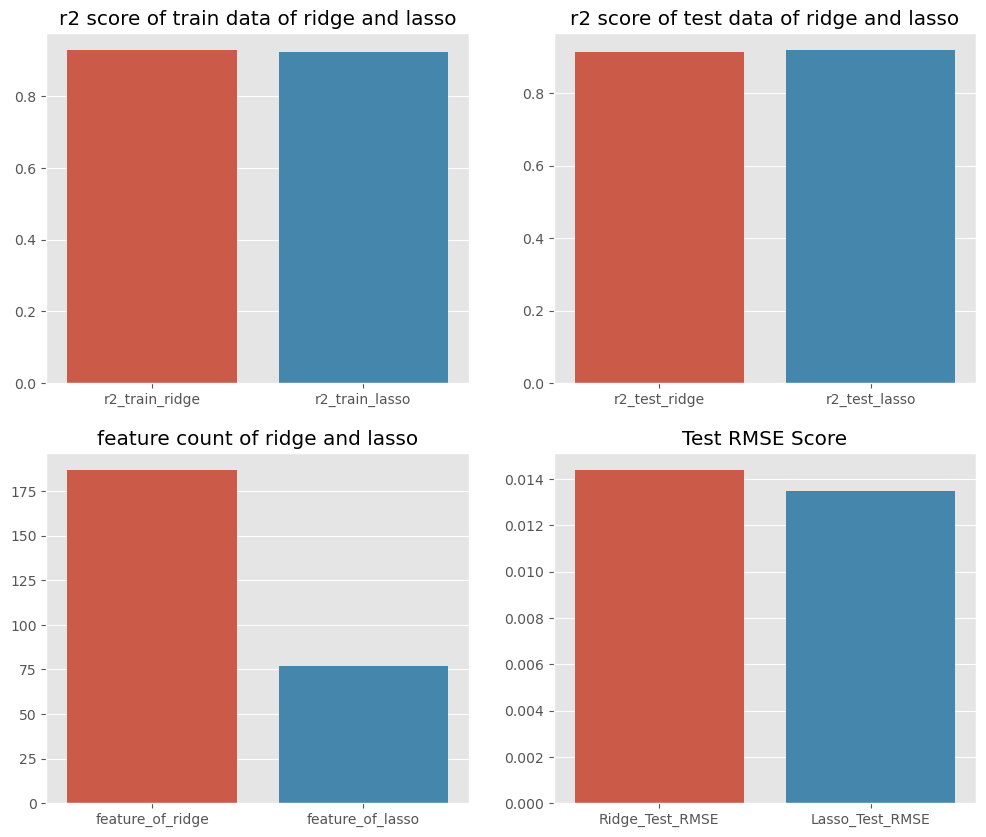

In [72]:
plt.figure(figsize=[12,10])
plt.style.use('ggplot')
plt.subplot(2,2,1)
df= {'r2_train_ridge': [0.9299162769875283], 'r2_train_lasso': [0.9227862283066279]}
sns.barplot(data= pd.DataFrame(df) )
plt.title('r2 score of train data of ridge and lasso')

plt.subplot(2,2,2)
df= {'r2_test_ridge': [0.9143482004006656], 'r2_test_lasso': [0.9197730237610156]}
sns.barplot(data= pd.DataFrame(df) )
plt.title('r2 score of test data of ridge and lasso')


plt.subplot(2,2,3)
df= {'feature_of_ridge': [ridge_coeff], 'feature_of_lasso': [lasso_coeff]}
sns.barplot(data= pd.DataFrame(df) )
plt.title('feature count of ridge and lasso')

plt.subplot(2,2,4)
test_rmse = {'Ridge_Test_RMSE':[0.014407180012094439] , 'Lasso_Test_RMSE': [0.013496695690764733] }
plt.title('Test RMSE Score')
plt2=sns.barplot(data=pd.DataFrame.from_dict(test_rmse))
plt.show()

#### inference: as we can see the r2 score of train and test for both ridge and lasso is almost same. but the number of feature taken for lasso is quite less compared to lasso

#### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

the optimal value for ridge is 8 and the optimal value of lasso is 0.001
if we double the alpha value for both ridge and lasso, the change in r2 score is not much but there is a visible change in their coefficients.


In [73]:
# lets build the final ridge model with twice the alpha

ridgereg2 = Ridge(alpha = 16)
ridgereg2.fit(X_train, y_train)

#lets predict the R-squared value of test and train data
y_train_pred = ridgereg2.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
#Displaing the co-efficients of the model
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridgereg2.coef_),columns=X_train.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
print(ridge_coeff2.head(10))


0.9248157635562784
                      Ridge Co-Efficient
Neighborhood_StoneBr            0.073322
OverallQual                     0.066650
Neighborhood_Crawfor            0.060807
Condition2_Norm                 0.049950
Exterior1st_BrkFace             0.049756
Neighborhood_NridgHt            0.047900
SaleCondition_Normal            0.046873
Condition1_Norm                 0.040418
GrLivArea                       0.040376
OverallCond                     0.040285


In [75]:
# lets build the final lasso model with twice the alpha

lasso2 =Lasso(alpha =0.002)
lasso2.fit(X_train, y_train)
y_train_pred = lasso2.predict(X_train)
print(r2_score(y_train, y_train_pred))
#Displaing the co-efficients of the model
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso2.coef_),columns=X_train.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: 'lasso Co-Efficient'},inplace=True)
lasso_coeff2.sort_values(by=['lasso Co-Efficient'], ascending=False,inplace=True)
print(lasso_coeff2.head(10))

0.903281307612036
                       lasso Co-Efficient
OverallQual                      0.081071
GrLivArea                        0.073107
OverallCond                      0.039755
TotalBsmtSF                      0.035033
SaleCondition_Partial            0.034597
Neighborhood_Crawfor             0.028388
Condition1_Norm                  0.027592
GarageArea                       0.024143
SaleCondition_Normal             0.023059
TotRmsAbvGrd                     0.022747



##### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [76]:
#Removing the 5 most important predictor variables from the incoming dataset
X_test_rfe3 = X_test.drop(['Neighborhood_StoneBr','Neighborhood_Crawfor','GrLivArea','OverallQual','Neighborhood_NridgHt'],axis=1)
X_train_rfe3 = X_train.drop(['Neighborhood_StoneBr','Neighborhood_Crawfor','GrLivArea','OverallQual','Neighborhood_NridgHt'],axis=1)

# Building Lasso Model with the new dataset
lasso3 = Lasso(alpha=0.0001,random_state=100)
lasso3.fit(X_train_rfe3,y_train)
lasso3_coef = lasso3.coef_
y_test_pred = lasso3.predict(X_test_rfe3)
print('The R2 Score of the model on the test dataset is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset is', mean_squared_error(y_test, y_test_pred))
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_train_rfe3.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso3_coeff.head(5)

The R2 Score of the model on the test dataset is 0.9165618009972352
The MSE of the model on the test dataset is 0.014036923967351869
The most important predictor variables are as follows:


,Lasso Co-Efficient
MSZoning_FV,0.441142
MSZoning_RL,0.386218
MSZoning_RH,0.378404
MSZoning_RM,0.340910
Condition2_PosA,0.214520
